# Fresh products

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

# Seize the opportunity of moving customers to FP

### Q1: Status of partner migration

What is the status of partner migration? At a country level and segmenting by MFCs and QCPartners

What is the status of partner/MFC migration. To identify if a product is fresh or not, we will use information of DH PIM. If a partner is not migrated, then we cannot know its information

In [3]:
q.prepare_query(
    'migrated_partners.sql'
    ,params=None
    ,to_load_file='migrated_partners'
    ,load_from_to_load_file='migrated_partners'
    
)

df_migrated_partners  = q.query_run_starburst()

# Pivot
df_pivoted = df_migrated_partners.pivot(index='country_code',columns='store_subvertical',values=['n_store_id','n_store_id_migrated','perc_store_id_migrated'])
df_pivoted.columns = [f'{col[0]}_{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()
df_pivoted = df_pivoted.fillna(0.00)
df_pivoted


,country_code,n_store_id_MFC,n_store_id_QCPartners,n_store_id_migrated_MFC,n_store_id_migrated_QCPartners,perc_store_id_migrated_MFC,perc_store_id_migrated_QCPartners
0,AD,0.0,1.0,0.0,0.0,0.00,0.00
1,AM,0.0,106.0,0.0,9.0,0.00,0.08
2,BA,0.0,83.0,0.0,60.0,0.00,0.72
3,BG,0.0,189.0,0.0,94.0,0.00,0.50
4,CI,1.0,62.0,1.0,25.0,1.00,0.40
5,ES,26.0,3171.0,25.0,682.0,0.96,0.22
6,GE,0.0,518.0,0.0,36.0,0.00,0.07
7,GH,0.0,52.0,0.0,3.0,0.00,0.06
8,HR,0.0,314.0,0.0,229.0,0.00,0.73
9,IT,28.0,2600.0,28.0,457.0,1.00,0.18


#### Q1.1: All countries together

In [4]:
print('all_groceries',df_pivoted['n_store_id_migrated_QCPartners'].sum()/df_pivoted['n_store_id_QCPartners'].sum())
print('mfc',df_pivoted['n_store_id_migrated_MFC'].sum()/df_pivoted['n_store_id_MFC'].sum())

all_groceries 0.2255379770563095
mfc 0.9807692307692307


#### Q1.2: How much population each country has in each segment?

In [7]:
df_pivoted.columns

Index(['country_code', 'n_store_id_MFC', 'n_store_id_QCPartners',
       'n_store_id_migrated_MFC', 'n_store_id_migrated_QCPartners',
       'perc_store_id_migrated_MFC', 'perc_store_id_migrated_QCPartners'],
      dtype='object')

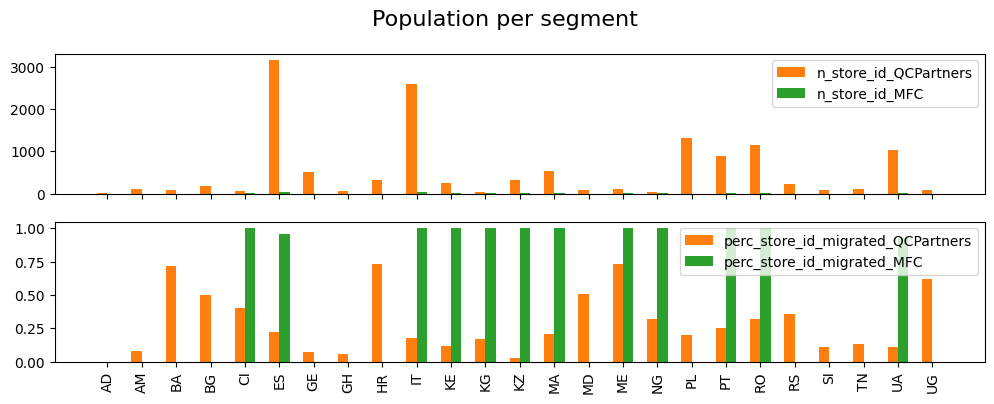

In [14]:
df_pivoted

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)

plot_params = [
    {
        'plot_type': 'barplot',
        'x_column': 'country_code',
        'y_columns': ['n_store_id_QCPartners','n_store_id_MFC'],
        'legend': True,
        'colors': ['orange','green']
    },
        {
        'plot_type': 'barplot',
        'x_column': 'country_code',
        'y_columns': ['perc_store_id_migrated_QCPartners','perc_store_id_migrated_MFC'],
        'legend': True,
        'colors': ['orange','green']
    },
]

# Define figure parameters
figure_params = {
    'n_plots': 2,
    'fig_length': 12,  
    'fig_height': 4,   
    'x_rotation': 90,  
    'x_limits': None,  
    'y_limits': None,  
    'share_x': True,   
    'share_y': False,   
    'title': 'Population per segment'
}

# Create the static plot
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

Conclusion:
- There are multiple countires with MFCs CI, ES, IT, KE, KG, KZ, MA, ME, NG, PT, RO, UA. We know that MFCs have been migrated for some time. But still, when I look at the data we see that the perc of MFCs migrated is not 100% in some cases (i.e: ES or UA). After raising this to MFCs team, they concluded that was a data issue of stores that really do not matter. Since we will use this information for latter inner joining with orders, this should not have any impact. 

- Regarding QCPartners of Groceries. The top countires are ES, IT, PL, RO, UA, PT. These guys represent the huge majority, and what we see is that a range between 20% to 30% of their store_ids have been mgirated. It is important to recognise that we will use this information to inner join at an order level. 

- Adding all countires together we have that 22% of Groceries QCPartners have been migrated, while 98% of MFCs has been migrated. 

- So the universe that we are looking globally is MFCs and 22% of QCPartners Groceries. This might not be fully representative of what is happening in all cases. Though, from business we know that the top partnesr have been migrated, and this count is not taking into account the volume of orders of each of the partners.

- In terms of Groceries Partners Fresh Products representation, I believe that the best representatives are (i)ES who has a large population and 25% migrated, (ii) IT who has large population and close to 20% migrated, (iii) PT, MA, RO, PL have a big enough population and also close to 20%.

- In terms of MFCs, all countries are representative

### Q2: Percentage of Fresh Orders

What percentage of migrated Partners contain at least one fresh product?

In [15]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'perc_orders_with_fresh_products.sql'
    ,params=params
    ,to_load_file='perc_orders_with_fresh_products'
    ,load_from_to_load_file='perc_orders_with_fresh_products'
    
)

df_perc_orders_with_fresh_products  = q.query_run_starburst()

# Pivot
df_perc_orders_with_fresh_products['perc_top_partners'] = df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_groceries_top_partners']/df_perc_orders_with_fresh_products['n_orders_groceries_top_partners']
df_perc_orders_with_fresh_products['perc_all_groceries'] = df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_all_groceries']/df_perc_orders_with_fresh_products['n_orders_all_groceries']
df_perc_orders_with_fresh_products['perc_mfc'] = df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_mfc']/df_perc_orders_with_fresh_products['n_orders_mfc']

df_perc_orders_with_fresh_products = df_perc_orders_with_fresh_products.fillna(0)
df_perc_orders_with_fresh_products[['country_code','perc_top_partners','perc_all_groceries','perc_mfc']].sort_values(by='perc_mfc', ascending=False)

,country_code,perc_top_partners,perc_all_groceries,perc_mfc
3,CI,0.273826,0.255208,0.403786
7,IT,0.441882,0.359420,0.323146
14,NG,0.092489,0.129935,0.320474
13,ME,0.548408,0.440596,0.288924
4,ES,0.418288,0.309174,0.288281
9,KG,0.284769,0.218413,0.262229
16,PT,0.352073,0.303115,0.238670
8,KE,0.294481,0.246403,0.237690
11,MA,0.396237,0.288991,0.233162
20,UA,0.378599,0.243320,0.213886


#### Q2.1: All countries together

In [16]:
print('all_groceries',df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_all_groceries'].sum()/df_perc_orders_with_fresh_products['n_orders_all_groceries'].sum())
print('top_partners',df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_groceries_top_partners'].sum()/df_perc_orders_with_fresh_products['n_orders_groceries_top_partners'].sum())
print('mfc',df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_mfc'].sum()/df_perc_orders_with_fresh_products['n_orders_mfc'].sum())

all_groceries 0.28776430416897014
top_partners 0.3697877971715646
mfc 0.26755177604497365


Conclusion:

- Looking at all groceries partners (that appear to be migrated). We have that there is a span that ranges from 53% down to 10%. If we compare at a country level the % of fresh orders of top partners vs all groceires partners, we see that, Top partners always show a greater penetration. Disclaimer again that we are only seeing migrated partners, thus we are missing surely a big portion of non top partnres. Nevertheless, it is signficiant to see that in most countries we always see a greater penetration in top partners that in all groceries. 

- MfC penetration rangers from 40% to 20%. Even in the lowest countries it represents a very big portions. In some countries, like CI and NG it has the biggest penetration of all segments. This might represent that the top_partners in those countries still do not have a complete infrastructure. 

- Adding all countries together. We see that All Groceries partners have a 28% Fresh Order penetration, while Top partners 36% and MFCs 26%. 

- In general the trend is that Top Parters pen > All Groceries pen > MFCs pen

### Q3: Distribution of FP in FO

For those orders that contain at least one fresh product, what is the distribution of % fresh products

In [20]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'distribution_of_fresh_products_in_fp_orders.sql'
    ,params=params
    ,to_load_file='distribution_of_fresh_products_in_fp_orders'
    ,load_from_to_load_file='distribution_of_fresh_products_in_fp_orders'
    
)

distribution_of_fresh_proudcts_in_fp_ordres = q.query_run_starburst()

distribution_of_fresh_proudcts_in_fp_ordres['perc_fp_top_partners'] = distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_top_partners']/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_top_partners']
distribution_of_fresh_proudcts_in_fp_ordres['perc_fp_all_groceries'] = distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_all_groceries']/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_all_groceries']
distribution_of_fresh_proudcts_in_fp_ordres['perc_fp_mfc'] = distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_mfc']/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_mfc']

distribution_of_fresh_proudcts_in_fp_ordres = distribution_of_fresh_proudcts_in_fp_ordres.fillna(0)

distribution_of_fresh_proudcts_in_fp_ordres.sort_values(by='country_code', inplace=True)

distribution_of_fresh_proudcts_in_fp_ordres[['country_code','perc_fp_top_partners','perc_fp_all_groceries','perc_fp_mfc']].sort_values(by='perc_fp_all_groceries', ascending=False)

,country_code,perc_fp_top_partners,perc_fp_all_groceries,perc_fp_mfc
19,MA,0.402557,0.402401,0.348413
8,CI,0.301695,0.369669,0.536975
21,KG,0.360022,0.360022,0.327371
14,UG,0.306439,0.359257,0.000000
3,NG,0.339954,0.348672,0.519645
4,TN,0.329362,0.336843,0.000000
7,GE,0.327082,0.327082,0.000000
18,HR,0.249870,0.314416,0.000000
1,KE,0.312183,0.312089,0.400127
17,MD,0.263577,0.277053,0.000000


Conclusions:

- For Fresh Ordres, we see that there is a fluctuation of 40% to 15% in all groceries partners. The top country being MA with difference. 

In [29]:
print('all_groceries',distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_all_groceries'].sum()/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_all_groceries'].sum())
print('top_partners',distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_top_partners'].sum()/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_top_partners'].sum())
print('mfc',distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_mfc'].sum()/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_mfc'].sum())

all_groceries 0.252091827355967
top_partners 0.24755337909946185
mfc 0.3169978161504618


### 2.1 Top distribution top partners vs non top partners

In [35]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'distribution_of_fresh_products_in_fp_orders_top_partners.sql'
    ,params=params
    ,to_load_file='distribution_of_fresh_products_in_fp_orders_top_partners'
    ,load_from_to_load_file=None
    
)

distribution_of_fresh_proudcts_in_fp_ordres_top_partners = q.query_run_starburst()

q.prepare_query(
    'distribution_of_fresh_products_in_fp_orders_non_top_partners.sql'
    ,params=params
    ,to_load_file='distribution_of_fresh_products_in_fp_orders_non_top_partners'
    ,load_from_to_load_file=None
    
)

distribution_of_fresh_proudcts_in_fp_ordres_non_top_partners = q.query_run_starburst()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/9965ca7b21c931f31dde8dc726b141279b67d4aa668889b09968ab4ccb48cbc1
Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/9778fe1914da127e0c0e793f32ebb68132ce3a4a1968517347a22060be55e3e4


In [36]:
# At a country level add the not top partner
tmp = pd.concat(
    [distribution_of_fresh_proudcts_in_fp_ordres_top_partners,distribution_of_fresh_proudcts_in_fp_ordres_non_top_partners],
)

tmp['store_name'] = tmp['store_name'].fillna('not_top_partner')

tmp

,country_code,store_name,n_pairs_orders_external_id_in_fp_orders,n_pairs_orders_fp_external_id_in_fp_orders
0,UA,EKO market/ЕКО маркет,2180,601
1,IT,Il Centesimo,2168,286
2,MA,Carrefour Gourmet,30722,12224
3,UG,Fraine Supermarket,2230,612
4,MA,Carrefour Express,63097,26427
...,...,...,...,...
15,RS,not_top_partner,10661,2541
16,BA,not_top_partner,1531,678
17,ME,not_top_partner,6387,2011
18,BG,not_top_partner,7161,3797


In [37]:
tmp['perc_fp_in_fp_orders'] = tmp['n_pairs_orders_fp_external_id_in_fp_orders']/tmp['n_pairs_orders_external_id_in_fp_orders']


tmp[['country_code','store_name','perc_fp_in_fp_orders']]

,country_code,store_name,perc_fp_in_fp_orders
0,UA,EKO market/ЕКО маркет,0.275688
1,IT,Il Centesimo,0.131919
2,MA,Carrefour Gourmet,0.397891
3,UG,Fraine Supermarket,0.274439
4,MA,Carrefour Express,0.418831
...,...,...,...
15,RS,not_top_partner,0.238345
16,BA,not_top_partner,0.442848
17,ME,not_top_partner,0.314858
18,BG,not_top_partner,0.530233


In [ ]:
for country in tmp['country_code'].unique():

    cond = tmp['country_code'] == country
    tmp.sort_values(by='perc_fp_in_fp_orders', ascending=False ,inplace=True)


    # Create an instance of DataFrameVisualizer
    v = dataframe_visualizer.DataFrameVisualizer(tmp[cond])

    # Define the plot configurations for each subplot
    plot_params = [
        {
            'plot_type': 'barplot',
            'x_column': 'store_name',
            'y_columns': ['perc_fp_in_fp_orders'],
            'legend': True,
        },
    ]

    # Define figure parameters
    figure_params = {
        'n_plots': 1,
        'fig_length': 12,  
        'fig_height': 8,   
        'x_rotation': 45,  
        'x_limits': None,  
        'y_limits': None,  
        'share_x': True,   
        'share_y': True,   
        'title': country
    }

    # Create the static plot
    v.plot(
        figure_params=figure_params,
        plot_params=plot_params
)

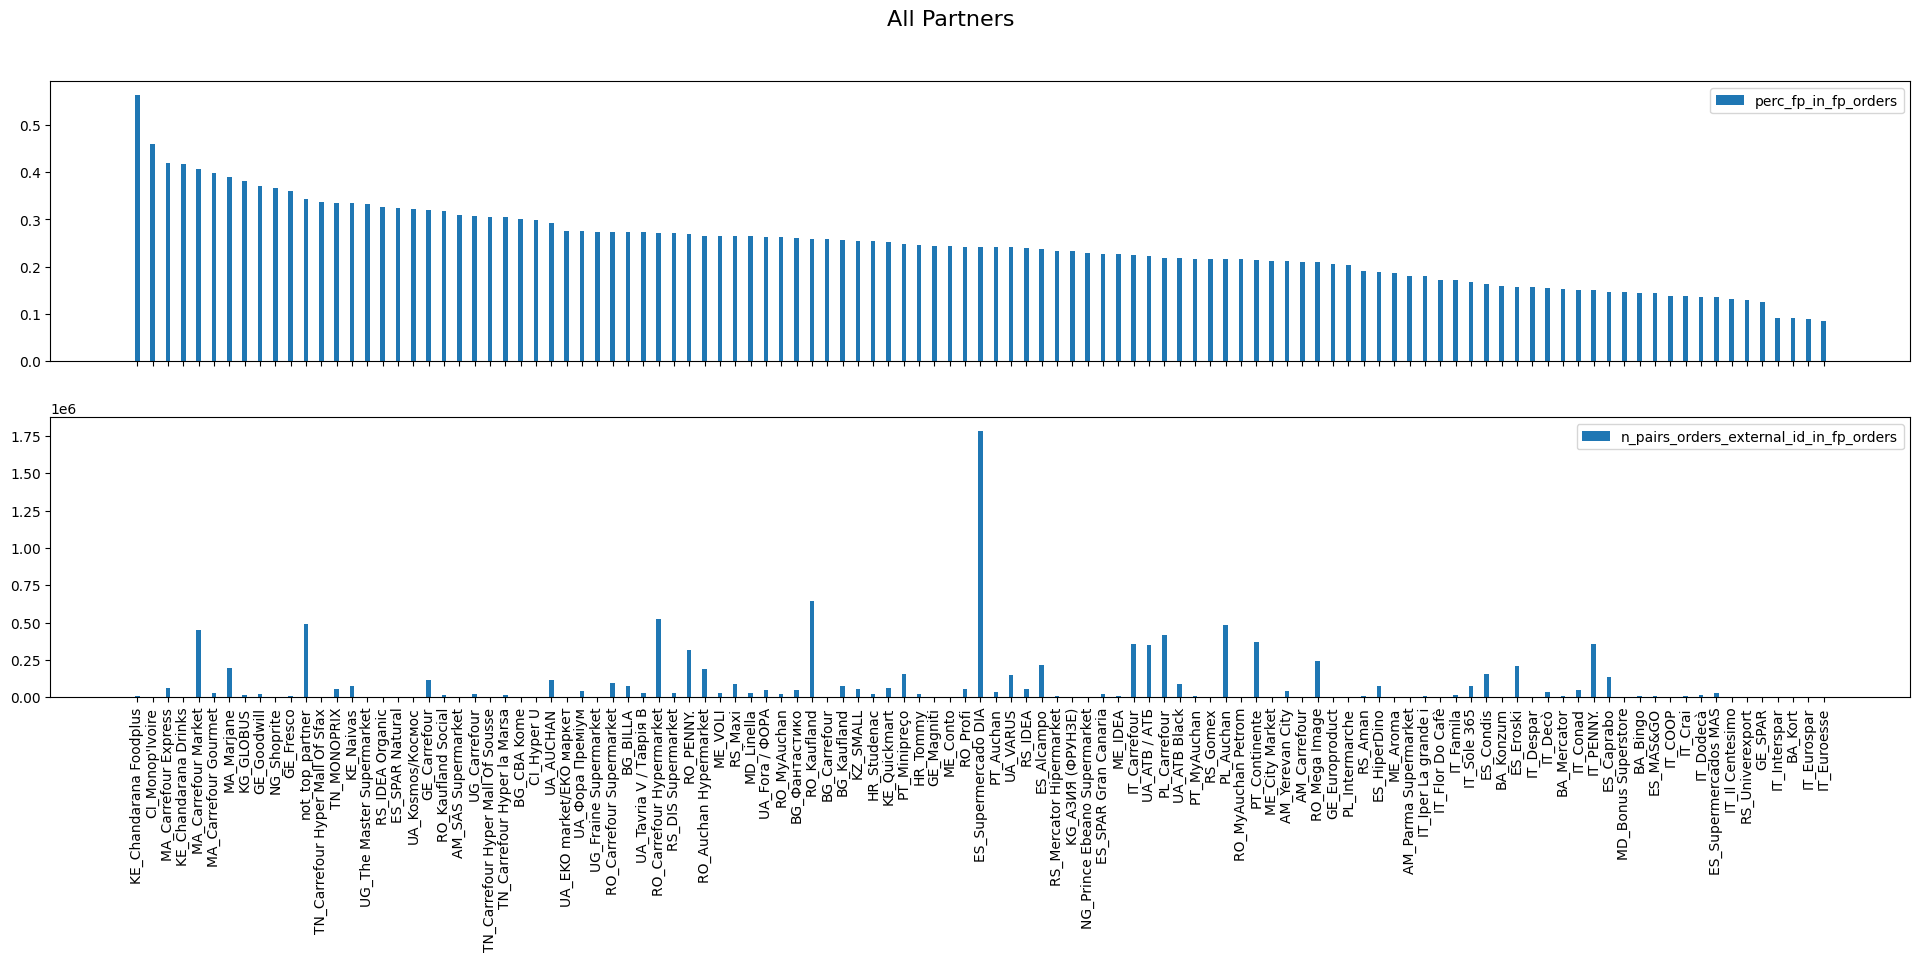

In [38]:
# All countries together
cond = tmp['store_name'] =='not_top_partner'
tmp2 = tmp[cond].copy()

tmp2_grouped = tmp2.groupby('store_name')[['n_pairs_orders_external_id_in_fp_orders','n_pairs_orders_fp_external_id_in_fp_orders']].sum().reset_index()
tmp2_grouped.rename(columns={'store_name':'concat_name'}, inplace=True)

tmp['concat_name'] = tmp['country_code'] + '_' + tmp['store_name']

tmp_grouped = tmp[~cond].groupby('concat_name')[['n_pairs_orders_external_id_in_fp_orders','n_pairs_orders_fp_external_id_in_fp_orders']].sum().reset_index()

tmp_grouped_concat = pd.concat(
    [tmp_grouped,tmp2_grouped]
)

tmp_grouped_concat['perc_fp_in_fp_orders'] = tmp_grouped_concat['n_pairs_orders_fp_external_id_in_fp_orders']/tmp_grouped_concat['n_pairs_orders_external_id_in_fp_orders']
tmp_grouped_concat.sort_values(by='perc_fp_in_fp_orders', ascending=False ,inplace=True)


# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(tmp_grouped_concat)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'barplot',
        'x_column': 'concat_name',
        'y_columns': ['perc_fp_in_fp_orders'],
        'legend': True,
    },
    {
        'plot_type': 'barplot',
        'x_column': 'concat_name',
        'y_columns': ['n_pairs_orders_external_id_in_fp_orders'],
        'legend': True,
    },
]

# Define figure parameters
figure_params = {
    'n_plots': 2,
    'fig_length': 24,  
    'fig_height': 8,   
    'x_rotation': 90,  
    'x_limits': None,  
    'y_limits': None,  
    'share_x': True,   
    'share_y': False,   
    'title': 'All Partners'
}

# Create the static plot
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

## Question 3

*Comparison between ordres with fresh produce and orders without fresh proudctcs. Are do they have different behaviour in terms of AOV initally placed.*

In [9]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'aov.sql'
    ,params=params
    ,to_load_file='aov'
    ,load_from_to_load_file='aov'
    
)

aov = q.query_run_starburst()

In [10]:
aov['tot_orders'] = aov['n_fp_orders'] + aov['n_non_fp_orders']

print((sum(aov['tot_orders'] == aov['n_orders']), len(aov['tot_orders'])))

(55, 55)


In [11]:
aov['tot_purchased'] = aov['eur_fp_purchased'] + aov['eur_non_fp_purchased']

print((sum(aov['tot_purchased'] == aov['eur_purchased']), len(aov['tot_orders'])))
print('nevermind, its OK. It is because the diff numbers are huge!')

(8, 55)
nevermind, its OK. It is because the diff numbers are huge!


In [13]:
aov['fp_aov'] = aov['eur_fp_purchased']/aov['n_fp_orders']
aov['non_fp_aov'] = aov['eur_non_fp_purchased']/aov['n_non_fp_orders']

tmp = aov.pivot(index='country_code', columns='store_subvertical', values=['n_fp_orders','fp_aov','fp_uipo','n_non_fp_orders','non_fp_aov','non_fp_uipo'])
tmp.columns = [f'{col[0]}__{col[1]}' for col in tmp.columns]
tmp.reset_index(inplace=True)
tmp.fillna(0, inplace=True)

tmp[['country_code',
    # aov
    'fp_aov__QCPartners','non_fp_aov__QCPartners',
    'fp_aov__MFC','non_fp_aov__MFC',
    'fp_aov__top_partners', 'non_fp_aov__top_partners',
    # uipo
    'fp_uipo__QCPartners','non_fp_uipo__QCPartners',
    'fp_uipo__MFC','non_fp_uipo__MFC',
    'fp_uipo__top_partners', 'non_fp_uipo__top_partners',
    # n_fp
    'n_fp_orders__QCPartners',
    'n_fp_orders__MFC',
    'n_fp_orders__top_partners'
    ]].sort_values(by='country_code')

,country_code,fp_aov__QCPartners,non_fp_aov__QCPartners,fp_aov__MFC,non_fp_aov__MFC,fp_aov__top_partners,non_fp_aov__top_partners,fp_uipo__QCPartners,non_fp_uipo__QCPartners,fp_uipo__MFC,non_fp_uipo__MFC,fp_uipo__top_partners,non_fp_uipo__top_partners,n_fp_orders__QCPartners,n_fp_orders__MFC,n_fp_orders__top_partners
0,AM,23.555287,16.946171,0.000000,0.000000,23.536805,16.573408,10.818920,5.590373,0.000000,0.000000,10.815389,5.994866,3816.0,0.0,3808.0
1,BA,27.235112,15.218972,0.000000,0.000000,28.594181,16.407991,12.103812,6.269663,0.000000,0.000000,12.585343,6.836938,1233.0,0.0,1078.0
2,BG,30.041328,20.491812,0.000000,0.000000,30.141273,20.738932,11.935594,5.825890,0.000000,0.000000,12.163032,6.469580,17281.0,0.0,16371.0
3,CI,19.043748,12.478255,12.620784,9.227833,22.741339,13.363020,6.525332,3.239969,6.043362,2.428721,6.866776,3.411523,12257.0,5973.0,608.0
4,ES,31.165268,20.048688,30.972339,20.849567,30.990354,18.919338,12.385372,5.405974,8.056100,3.937907,12.471060,6.054104,219204.0,36221.0,206339.0
5,GE,20.321498,17.287519,0.000000,0.000000,20.321498,19.894267,9.868368,5.915989,0.000000,0.000000,9.868368,7.879741,14776.0,0.0,14776.0
6,HR,21.889436,14.782703,0.000000,0.000000,21.405540,14.439360,7.558350,3.606713,0.000000,0.000000,8.957485,4.675499,6401.0,0.0,4422.0
7,IT,32.133203,18.912951,32.578011,18.676882,31.910235,18.419936,13.050395,5.464091,8.900883,3.991383,13.265738,6.300291,70583.0,31589.0,66656.0
8,KE,15.940319,12.223545,11.741960,8.863582,15.941162,12.000028,7.806577,4.310682,5.999339,2.413850,7.806079,4.447997,19067.0,9073.0,19049.0
9,KG,11.026189,8.971014,16.266966,10.369351,11.026189,7.982735,8.035872,3.252131,7.695763,3.438551,8.035872,3.649048,2258.0,3517.0,2258.0


In [18]:
tmp.columns

Index(['country_code', 'n_fp_orders__MFC', 'n_fp_orders__QCPartners',
       'n_fp_orders__top_partners', 'eur_fp_purchased__MFC',
       'eur_fp_purchased__QCPartners', 'eur_fp_purchased__top_partners',
       'n_non_fp_orders__MFC', 'n_non_fp_orders__QCPartners',
       'n_non_fp_orders__top_partners', 'eur_non_fp_purchased__MFC',
       'eur_non_fp_purchased__QCPartners',
       'eur_non_fp_purchased__top_partners'],
      dtype='object')

In [19]:
# Totals
# aov['fp_aov'] = aov['eur_fp_purchased']/aov['n_fp_orders']
# aov['non_fp_aov'] = aov['eur_non_fp_purchased']/aov['n_non_fp_orders']

tmp = aov.pivot(index='country_code', columns='store_subvertical', values=['n_fp_orders','eur_fp_purchased','n_non_fp_orders','eur_non_fp_purchased'])
tmp.columns = [f'{col[0]}__{col[1]}' for col in tmp.columns]
tmp.reset_index(inplace=True)
tmp.fillna(0, inplace=True)

tmp[['country_code',
    # fp orders
    'n_fp_orders__QCPartners',
    'n_fp_orders__MFC',
    'n_fp_orders__top_partners',
    # fp eur
    'eur_fp_purchased__QCPartners',
    'eur_fp_purchased__MFC',
    'eur_fp_purchased__top_partners',

    # non fp orders
    'n_non_fp_orders__QCPartners',
    'n_non_fp_orders__MFC',
    'n_non_fp_orders__top_partners',
    # non fp eur
    'eur_non_fp_purchased__QCPartners',
    'eur_non_fp_purchased__MFC',
    'eur_non_fp_purchased__top_partners'
    ]].sort_values(by='country_code')

,country_code,n_fp_orders__QCPartners,n_fp_orders__MFC,n_fp_orders__top_partners,eur_fp_purchased__QCPartners,eur_fp_purchased__MFC,eur_fp_purchased__top_partners,n_non_fp_orders__QCPartners,n_non_fp_orders__MFC,n_non_fp_orders__top_partners,eur_non_fp_purchased__QCPartners,eur_non_fp_purchased__MFC,eur_non_fp_purchased__top_partners
0,AM,3816.0,0.0,3808.0,8.988698e+04,0.000000e+00,8.962815e+04,7209.0,0.0,5649.0,1.221649e+05,0.000000e+00,9.362318e+04
1,BA,1233.0,0.0,1078.0,3.358089e+04,0.000000e+00,3.082453e+04,2136.0,0.0,1803.0,3.250772e+04,0.000000e+00,2.958361e+04
2,BG,17281.0,0.0,16371.0,5.191442e+05,0.000000e+00,4.934428e+05,14778.0,0.0,11144.0,3.028280e+05,0.000000e+00,2.311147e+05
3,CI,12257.0,5973.0,608.0,2.334192e+05,7.538394e+04,1.382673e+04,37009.0,9540.0,1701.0,4.618077e+05,8.803353e+04,2.273050e+04
4,ES,219204.0,36221.0,206339.0,6.831551e+06,1.121849e+06,6.394519e+06,543076.0,88866.0,337574.0,1.088796e+07,1.852818e+06,6.386677e+06
5,GE,14776.0,0.0,14776.0,3.002704e+05,0.000000e+00,3.002704e+05,126912.0,0.0,65575.0,2.193994e+06,0.000000e+00,1.304567e+06
6,HR,6401.0,0.0,4422.0,1.401143e+05,0.000000e+00,9.465530e+04,18292.0,0.0,7963.0,2.704052e+05,0.000000e+00,1.149806e+05
7,IT,70583.0,31589.0,66656.0,2.268058e+06,1.029107e+06,2.127009e+06,133519.0,67659.0,90935.0,2.525238e+06,1.263659e+06,1.675017e+06
8,KE,19067.0,9073.0,19049.0,3.039341e+05,1.065348e+05,3.036632e+05,61587.0,29588.0,48766.0,7.528114e+05,2.622557e+05,5.851933e+05
9,KG,2258.0,3517.0,2258.0,2.489713e+04,5.721092e+04,2.489713e+04,8095.0,9992.0,5619.0,7.262035e+04,1.036106e+05,4.485499e+04


In [23]:
print('all_groceries',tmp['eur_fp_purchased__QCPartners'].sum()/tmp['n_fp_orders__QCPartners'].sum())
print('top_partners',tmp['eur_fp_purchased__top_partners'].sum()/tmp['n_fp_orders__top_partners'].sum())
print('mfc',tmp['eur_fp_purchased__MFC'].sum()/tmp['n_fp_orders__MFC'].sum())

all_groceries 26.862417017208937
top_partners 27.09063532674111
mfc 23.483061028256934


In [24]:
print('all_groceries',tmp['eur_non_fp_purchased__QCPartners'].sum()/tmp['n_non_fp_orders__QCPartners'].sum())
print('top_partners',tmp['eur_non_fp_purchased__top_partners'].sum()/tmp['n_non_fp_orders__top_partners'].sum())
print('mfc',tmp['eur_non_fp_purchased__MFC'].sum()/tmp['n_non_fp_orders__MFC'].sum())

all_groceries 17.00739154408805
top_partners 17.627134116157244
mfc 14.519040598464688


In [142]:
tmp['var_aov__QCPartners'] = (tmp['fp_aov__QCPartners'] - tmp['non_fp_aov__QCPartners'])/tmp['non_fp_aov__QCPartners']
tmp['var_aov__MFC'] = (tmp['fp_aov__MFC'] - tmp['non_fp_aov__MFC'])/tmp['non_fp_aov__MFC']
tmp['var_aov__top_partners'] = (tmp['fp_aov__top_partners'] - tmp['non_fp_aov__top_partners'])/tmp['non_fp_aov__top_partners']

tmp['var_uipo__QCPartners'] = (tmp['fp_uipo__QCPartners'] - tmp['non_fp_uipo__QCPartners'])/tmp['non_fp_uipo__QCPartners']
tmp['var_uipo__MFC'] = (tmp['fp_uipo__MFC'] - tmp['non_fp_uipo__MFC'])/tmp['non_fp_uipo__MFC']
tmp['var_uipo__top_partners'] = (tmp['fp_uipo__top_partners'] - tmp['non_fp_uipo__top_partners'])/tmp['non_fp_uipo__top_partners']


tmp[['country_code','var_aov__QCPartners','var_aov__MFC','var_aov__top_partners','var_uipo__QCPartners','var_uipo__MFC','var_uipo__top_partners']].sort_values(by='country_code').fillna(0)


,country_code,var_aov__QCPartners,var_aov__MFC,var_aov__top_partners,var_uipo__QCPartners,var_uipo__MFC,var_uipo__top_partners
0,AM,0.390006,0.000000,0.420155,0.935277,0.000000,0.804108
1,BA,0.789550,0.000000,0.742699,0.930536,0.000000,0.840786
2,BG,0.466016,0.000000,0.453367,1.048716,0.000000,0.880034
3,CI,0.526155,0.367687,0.701811,1.014011,1.488290,1.012819
4,ES,0.554479,0.485515,0.638025,1.291053,1.045782,1.059935
5,GE,0.175501,0.000000,0.021475,0.668084,0.000000,0.252372
6,HR,0.480747,0.000000,0.482444,1.095634,0.000000,0.915835
7,IT,0.699005,0.744296,0.732375,1.388393,1.230025,1.105575
8,KE,0.304067,0.324742,0.328427,0.810984,1.485382,0.754965
9,KG,0.229091,0.568755,0.381254,1.470956,1.238083,1.202183


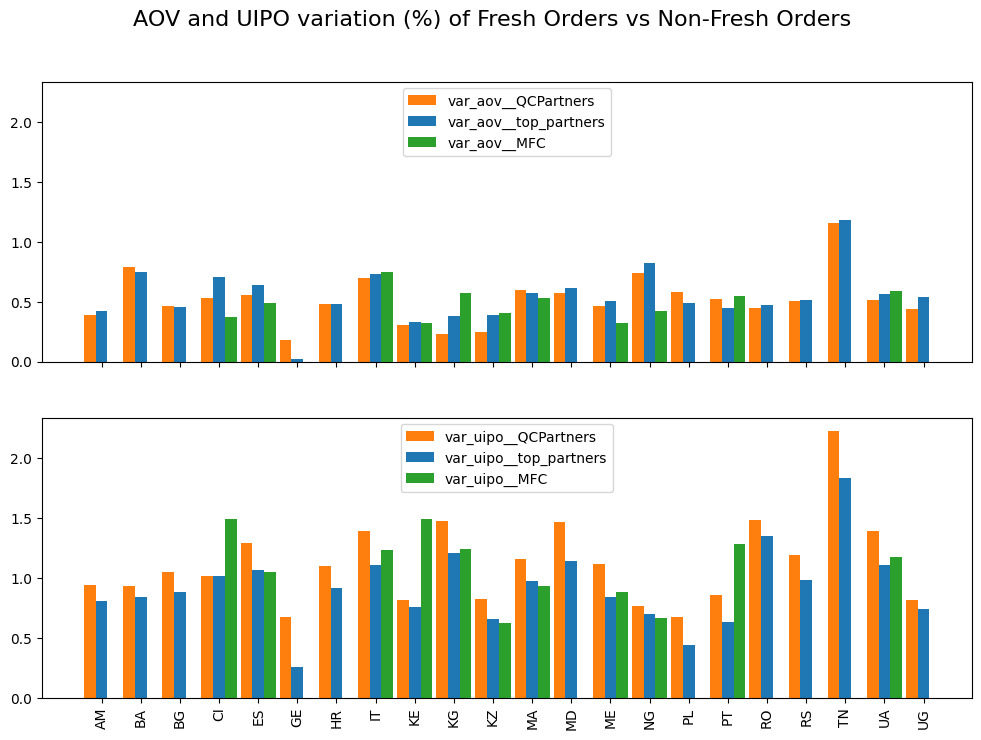

In [153]:
v = dataframe_visualizer.DataFrameVisualizer(tmp)

plot_params = [
    {
        'plot_type': 'barplot',
        'x_column': 'country_code',
        'y_columns': ['var_aov__QCPartners','var_aov__top_partners','var_aov__MFC'],
        'legend': True,
        'colors': ['orange','blue','green']
    },
    {
        'plot_type': 'barplot',
        'x_column': 'country_code',
        'y_columns': ['var_uipo__QCPartners','var_uipo__top_partners','var_uipo__MFC'],
        'legend': True,
        'colors': ['orange','blue','green']
    },
]

# Define figure parameters
figure_params = {
    'n_plots': 2,
    'fig_length': 12,  
    'fig_height': 8,   
    'x_rotation': 90,  
    'x_limits': None,  
    'y_limits': None,  
    'share_x': True,   
    'share_y': True,   
    'title': 'AOV and UIPO variation (%) of Fresh Orders vs Non-Fresh Orders'
}

# Create the static plot
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

In [139]:
# This one is to check 
aov['aov'] = aov['tot_purchased']/aov['tot_orders']
aov.sort_values(by='country_code')

,country_code,store_subvertical,n_fp_orders,eur_fp_purchased,fp_uipo,n_non_fp_orders,eur_non_fp_purchased,non_fp_uipo,n_orders,eur_purchased,uipo,tot_orders,tot_purchased,fp_aov,non_fp_aov,aov
39,AM,QCPartners,3816,8.988698e+04,10.818920,7209,1.221649e+05,5.590373,11025,2.120519e+05,7.400091,11025,2.120519e+05,23.555287,16.946171,19.233735
12,AM,top_partners,3808,8.962815e+04,10.815389,5649,9.362318e+04,5.994866,9457,1.832513e+05,7.935920,9457,1.832513e+05,23.536805,16.573408,19.377322
52,BA,QCPartners,1233,3.358089e+04,12.103812,2136,3.250772e+04,6.269663,3369,6.608862e+04,8.404868,3369,6.608862e+04,27.235112,15.218972,19.616687
10,BA,top_partners,1078,3.082453e+04,12.585343,1803,2.958361e+04,6.836938,2881,6.040813e+04,8.987851,2881,6.040813e+04,28.594181,16.407991,20.967766
36,BG,QCPartners,17281,5.191442e+05,11.935594,14778,3.028280e+05,5.825890,32059,8.219722e+05,9.119249,32059,8.219722e+05,30.041328,20.491812,25.639358
19,BG,top_partners,16371,4.934428e+05,12.163032,11144,2.311147e+05,6.469580,27515,7.245574e+05,9.857096,27515,7.245574e+05,30.141273,20.738932,26.333179
0,CI,top_partners,608,1.382673e+04,6.866776,1701,2.273050e+04,3.411523,2309,3.655723e+04,4.321351,2309,3.655723e+04,22.741339,13.363020,15.832495
40,CI,QCPartners,12257,2.334192e+05,6.525332,37009,4.618077e+05,3.239969,49266,6.952270e+05,4.057342,49266,6.952270e+05,19.043748,12.478255,14.111699
25,CI,MFC,5973,7.538394e+04,6.043362,9540,8.803353e+04,2.428721,15513,1.634175e+05,3.820473,15513,1.634175e+05,12.620784,9.227833,10.534228
51,ES,MFC,36221,1.121849e+06,8.056100,88866,1.852818e+06,3.937907,125087,2.974667e+06,5.130397,125087,2.974667e+06,30.972339,20.849567,23.780782


## Question 4

*What % of ordres have PNA - If they do what is the impact on Groceries retention. And what is the impact on fresh product retention. And store id.*

*What is the % of ordres that have bad feedback - if they do what is the impact on Groceries retention. And what is the impact on fresh product retention. And store id.*

In [7]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value':str(START_DATE)},
    {'name':'end_date', 'value':str(END_DATE)}
]

q.prepare_query(
    'pna_ret_wm_orders.sql'
    ,params=params
    ,to_load_file='pna_ret_wm_orders'
    ,load_from_to_load_file=None
)

pna = q.query_run_starburst()

Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/f673160d679e58580869b85652862b5db680cdc4df8a64d816619d5346abf300


In [8]:
pna

,country_code,n_not_fp_orders_all_groceries,n_not_fp_orders_ret1_subvertical2_all_groceries,n_not_fp_orders_ret1_store_name_all_groceries,n_not_fp_orders_pna_all_groceries,n_not_fp_orders_wm_all_groceries,n_fp_orders_all_groceries,n_fp_orders_ret1_subvertical2_all_groceries,n_fp_orders_ret1_store_name_all_groceries,n_fp_orders_pna_all_groceries,n_fp_orders_wm_all_groceries
0,AM,10102,7441,6642,2388,136,3948,3014,2787,1371,55
1,BA,3700,2013,1483,1020,0,1373,791,575,478,0
2,BG,32015,21679,16893,9468,415,17989,12483,9802,6450,264
3,CI,42655,33028,22822,7876,586,12484,10492,7399,2932,255
4,ES,471525,349983,286344,182919,14392,225063,175317,147492,109604,8921
5,GE,32275,23599,14936,11463,1070,15469,12041,8195,6805,629
6,HR,22674,12096,8906,5008,267,6814,4290,3076,2132,121
7,IT,171556,104180,80489,85274,5658,74525,47984,37808,47168,2996
8,KE,48558,34223,26107,10280,1497,19898,14939,11737,4831,773
9,KG,8286,4890,3728,724,315,2453,1553,1213,283,136
